In [1]:
from google.colab import drive
drive.mount('/content/drive')

# Read data

In [2]:
import pandas as pd

In [3]:
df_AAPL = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Science Project/AAPL(Apple).csv')
df_AMZN = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Science Project/AMZN(Amazon).csv')
df_NKE = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Science Project/NKE(Nike).csv')
df_PFE = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Science Project/PFE(Pfizer).csv')
df_TSLA = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Science Project/TSLA(Tesla).csv')
df_XOM = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Science Project/XOM(Exxon).csv')

# Handle missing values

In [4]:
df_AAPL.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,38.722500,39.712502,38.557499,39.480000,37.994492,148158800
1,2019-01-03,35.994999,36.430000,35.500000,35.547501,34.209961,365248800
2,2019-01-04,36.132500,37.137501,35.950001,37.064999,35.670361,234428400
3,2019-01-07,37.174999,37.207500,36.474998,36.982498,35.590958,219111200
4,2019-01-08,37.389999,37.955002,37.130001,37.687500,36.269432,164101200
5,2019-01-09,37.822498,38.632500,37.407501,38.327499,36.885353,180396400
6,2019-01-10,38.125000,38.492500,37.715000,38.450001,37.003250,143122800
7,2019-01-11,38.220001,38.424999,37.877499,38.072498,36.639954,108092800
8,2019-01-14,37.712502,37.817501,37.305000,37.500000,36.088997,129756800
9,2019-01-15,37.567501,38.347500,37.512501,38.267502,36.827618,114843600


There are missing rows because of the missing dates

In [5]:
df_AAPL.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
import pandas as pd
from datetime import datetime, timedelta


*   Add new rows to missing dates
*   Fill missing stocks prices with ffill
*   Set Date as index




In [7]:
def handleMissingValues(df_s):
  df = df_s
  df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
  df = df.set_index('Date')
  start_date = '2019-01-01'
  end_date = '2022-12-31'
  date_range = pd.date_range(start=start_date, end=end_date)
  df = df.reindex(date_range)
  df_copy = df.copy()
  df_copy.fillna(method='ffill', inplace=True)
  df_copy.iloc[0] = df_copy.iloc[1]
  return df_copy

In [8]:
def handleMissingValues2(df_s):
  df = df_s
  df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%y')
  df = df.set_index('Date')
  start_date = '2019-01-01'
  end_date = '2022-12-31'
  date_range = pd.date_range(start=start_date, end=end_date)
  df = df.reindex(date_range)
  df_copy = df.copy()
  df_copy.fillna(method='ffill', inplace=True)
  df_copy.iloc[0] = df_copy.iloc[1]
  return df_copy

In [9]:
df_AAPL = handleMissingValues(df_AAPL)
df_AMZN = handleMissingValues(df_AMZN)
df_NKE = handleMissingValues(df_NKE)
df_PFE = handleMissingValues(df_PFE)
df_TSLA = handleMissingValues(df_TSLA)
df_XOM = handleMissingValues2(df_XOM) # df_XOM is using f2 because of the different date format

In [10]:
df_AAPL

,Open,High,Low,Close,Adj Close,Volume
2019-01-01,38.722500,39.712502,38.557499,39.480000,37.994492,148158800.0
2019-01-02,38.722500,39.712502,38.557499,39.480000,37.994492,148158800.0
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.209961,365248800.0
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.670361,234428400.0
2019-01-05,36.132500,37.137501,35.950001,37.064999,35.670361,234428400.0
...,...,...,...,...,...,...
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.652435,69007800.0
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.674026,85438400.0
2022-12-29,127.989998,130.479996,127.730003,129.610001,129.233658,75703700.0
2022-12-30,128.410004,129.949997,127.430000,129.929993,129.552719,77034200.0


# Making Networks of connectivity

As reference from each column, we will take the 'Close' attribute,

In [11]:
d = {'AAPL': df_AAPL.iloc[:,3], 'AMZN': df_AMZN.iloc[:,3], 'NKE': df_NKE.iloc[:,3], 'PFE': df_PFE.iloc[:,3], 'XOM': df_XOM.iloc[:,3], 'TSLA': df_TSLA.iloc[:,3]}
data = pd.DataFrame(data=d)

In [12]:
data.head()

,AAPL,AMZN,NKE,PFE,XOM,TSLA
2019-01-01,39.480000,76.956497,74.059998,41.034157,69.690002,20.674667
2019-01-02,39.480000,76.956497,74.059998,41.034157,69.690002,20.674667
2019-01-03,35.547501,75.014000,72.750000,39.886147,68.620003,20.024000
2019-01-04,37.064999,78.769501,74.650002,40.796963,71.150002,21.179333
2019-01-05,37.064999,78.769501,74.650002,40.796963,71.150002,21.179333


In [13]:
data.tail()

,AAPL,AMZN,NKE,PFE,XOM,TSLA
2022-12-27,130.029999,83.040001,117.559998,51.130001,110.190002,109.099998
2022-12-28,126.040001,81.820000,114.980003,50.799999,108.379997,112.709999
2022-12-29,129.610001,84.180000,117.349998,51.330002,109.199997,121.820000
2022-12-30,129.929993,84.000000,117.010002,51.240002,110.300003,123.180000
2022-12-31,129.929993,84.000000,117.010002,51.240002,110.300003,123.180000


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1461 entries, 2019-01-01 to 2022-12-31
Freq: D
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1461 non-null   float64
 1   AMZN    1461 non-null   float64
 2   NKE     1461 non-null   float64
 3   PFE     1461 non-null   float64
 4   XOM     1461 non-null   float64
 5   TSLA    1461 non-null   float64
dtypes: float64(6)
memory usage: 79.9 KB


**Data visualization**

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

How did the price move trough the period of 01.01.2019 to 31.12.2022

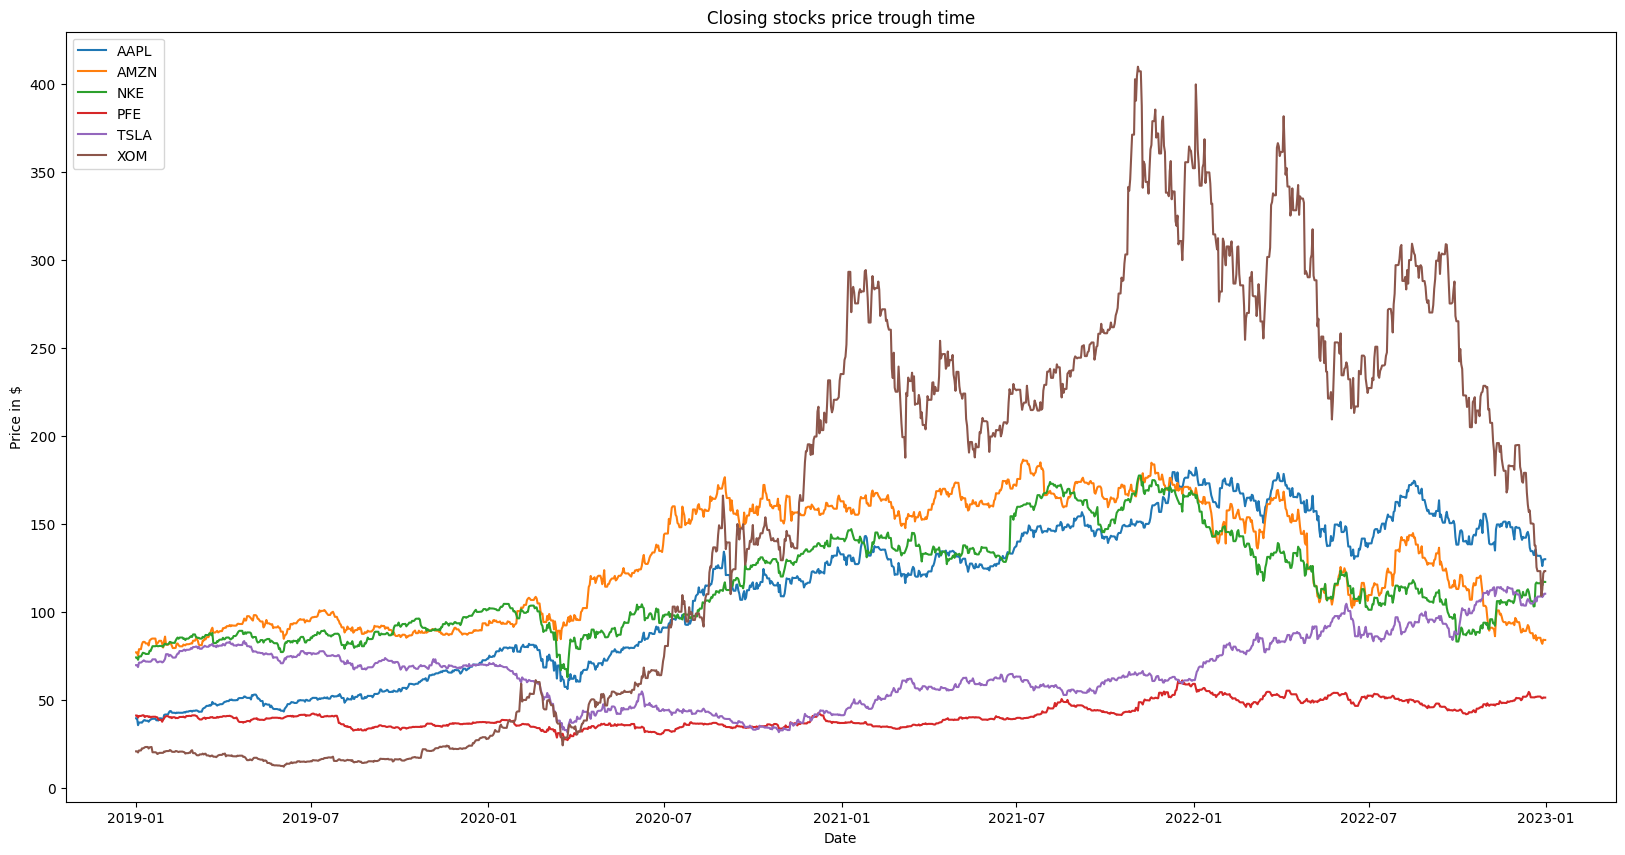

In [16]:
plt.figure(figsize=(20,10))
plt.plot(data)
plt.title('Closing stocks price trough time')
plt.ylabel('Price in $')
plt.xlabel('Date')
plt.legend(['AAPL','AMZN','NKE','PFE','TSLA','XOM'], loc='upper left')
plt.show()

What was the correlation between different stocks closing prices?

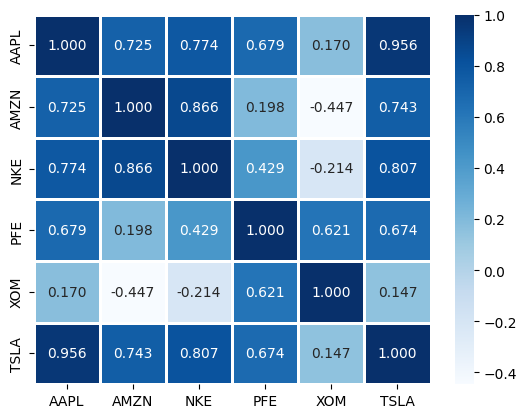

In [17]:
plt.figure()
sns.heatmap(data.corr(), annot=True, cmap='Blues', fmt='.3f', linewidths=1)
plt.show()

TTS 80/20

y = TSLA

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1:]

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.2, random_state=0)


In [21]:
X_test

,AAPL,AMZN,NKE,PFE,XOM
2020-06-14,84.699997,127.250999,96.430000,32.020874,47.169998
2020-10-19,115.980003,160.360504,127.430000,35.863377,33.419998
2020-04-04,60.352501,95.329498,78.860001,31.916510,39.209999
2019-10-07,56.764999,86.633003,93.169998,33.994308,68.019997
2020-10-18,119.019997,163.635498,128.000000,36.005692,34.099998
...,...,...,...,...,...
2020-03-16,60.552502,84.457497,66.790001,28.633776,34.490002
2020-09-26,112.279999,154.756500,124.230003,34.203037,34.639999
2020-05-09,77.532501,118.980499,90.459999,35.313091,46.180000
2019-03-03,43.742500,83.586502,87.160004,41.138519,80.000000


In [22]:
Y_test

,TSLA
2020-06-14,62.352001
2020-10-19,143.610001
2020-04-04,32.000668
2019-10-07,15.848000
2020-10-18,146.556671
...,...
2020-03-16,29.671333
2020-09-26,135.779999
2020-05-09,54.627998
2019-03-03,19.652666


In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [24]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
import numpy as np

In [26]:
X_train.shape

(1168, 5)

In [27]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [28]:
X_train.shape

(1168, 1, 5)

In [29]:
model = Sequential()

model.add(LSTM(128, input_shape=(1,5), activation='relu', return_sequences=True))

model.add(LSTM(64, activation='relu'))

model.add(Dense(25 ,activation='linear'))

model.add(Dense(1 ,activation='linear'))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 128)            68608     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 119,667
Trainable params: 119,667
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [32]:
history = model.fit(X_train, Y_train, shuffle=False, validation_split=0.2, epochs=100, batch_size=16)

Epoch 1/100
59/59 [==============================] - 12s 61ms/step - loss: 38160.2969 - mean_absolute_error: 157.7681 - val_loss: 38720.9297 - val_mean_absolute_error: 161.2229
Epoch 2/100
59/59 [==============================] - 1s 13ms/step - loss: 18491.3711 - mean_absolute_error: 102.1544 - val_loss: 4914.0645 - val_mean_absolute_error: 50.7919
Epoch 3/100
59/59 [==============================] - 1s 12ms/step - loss: 2818.3833 - mean_absolute_error: 38.8413 - val_loss: 2138.6738 - val_mean_absolute_error: 34.0429
Epoch 4/100
59/59 [==============================] - 1s 14ms/step - loss: 1969.9039 - mean_absolute_error: 32.3765 - val_loss: 1762.2164 - val_mean_absolute_error: 30.2780
Epoch 5/100
59/59 [==============================] - 1s 14ms/step - loss: 1678.9355 - mean_absolute_error: 29.7298 - val_loss: 1507.0983 - val_mean_absolute_error: 27.9538
Epoch 6/100
59/59 [==============================] - 1s 15ms/step - loss: 1475.6637 - mean_absolute_error: 27.8973 - val_loss: 1330.4

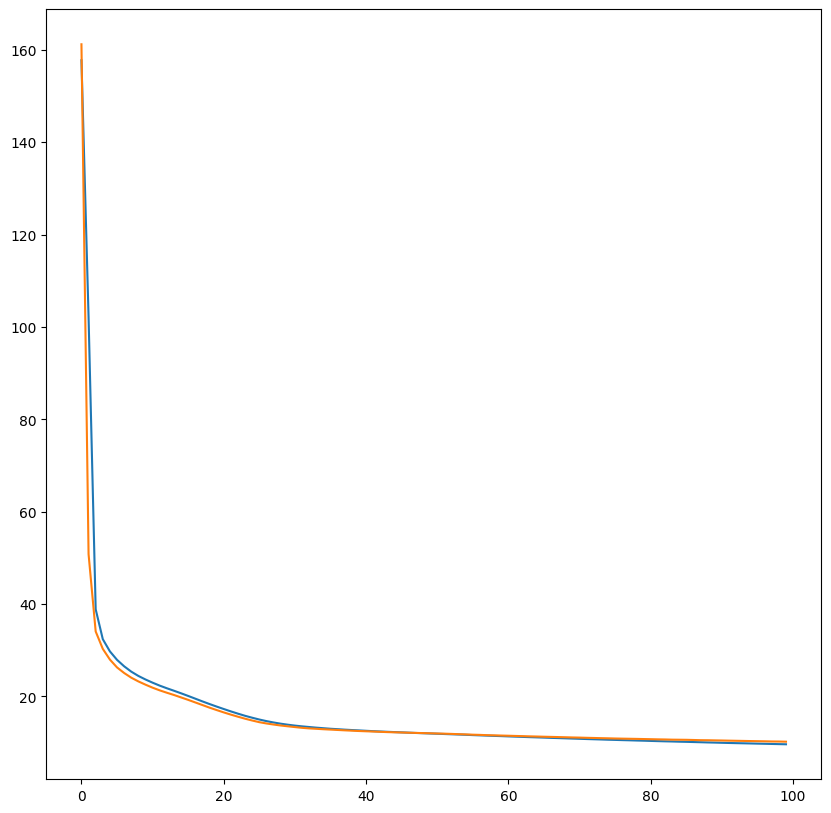

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])

In [34]:
Y_pred = model.predict(X_test)

10/10 [==============================] - 0s 3ms/step


In [35]:
Y_pred[1]

array([146.53113], dtype=float32)

In [36]:
from sklearn.metrics import r2_score

r2_score(Y_test,Y_pred)

0.9855802432922439

In [37]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(Y_test,Y_pred)

9.845215512974448

In [38]:
Y_test = Y_test.reset_index(drop=True)

In [39]:
Y_pred = pd.DataFrame(data=Y_pred)

In [40]:
vis = pd.concat([Y_test, Y_pred], axis=1)

In [41]:
vis.columns=["Closing Price", "Predicted Price"]

In [42]:
vis

,Closing Price,Predicted Price
0,62.352001,63.400600
1,143.610001,146.531128
2,32.000668,29.545956
3,15.848000,16.357227
4,146.556671,148.623062
...,...,...
288,29.671333,28.145443
289,135.779999,142.014069
290,54.627998,53.077267
291,19.652666,16.572687


# Centrality Measures

In [43]:
stock_prices = pd.concat([df_AAPL['Close'], df_AMZN['Close'], df_NKE['Close'], df_PFE['Close'], df_TSLA['Close'], df_XOM['Close']], axis=1)

In [44]:
stock_prices.columns = ['AAPL', 'AMZN', 'NKE', 'PFE', 'TSLA', 'XOM']

In [45]:
stock_prices

,AAPL,AMZN,NKE,PFE,TSLA,XOM
2019-01-01,39.480000,76.956497,74.059998,41.034157,20.674667,69.690002
2019-01-02,39.480000,76.956497,74.059998,41.034157,20.674667,69.690002
2019-01-03,35.547501,75.014000,72.750000,39.886147,20.024000,68.620003
2019-01-04,37.064999,78.769501,74.650002,40.796963,21.179333,71.150002
2019-01-05,37.064999,78.769501,74.650002,40.796963,21.179333,71.150002
...,...,...,...,...,...,...
2022-12-27,130.029999,83.040001,117.559998,51.130001,109.099998,110.190002
2022-12-28,126.040001,81.820000,114.980003,50.799999,112.709999,108.379997
2022-12-29,129.610001,84.180000,117.349998,51.330002,121.820000,109.199997
2022-12-30,129.929993,84.000000,117.010002,51.240002,123.180000,110.300003


Correlation Matrix

In [46]:
returns = stock_prices.pct_change().dropna()
correlation_matrix = returns.corr()

In [47]:
correlation_matrix

,AAPL,AMZN,NKE,PFE,TSLA,XOM
AAPL,1.000000,0.653431,0.559343,0.340950,0.493920,0.336786
AMZN,0.653431,1.000000,0.473925,0.216605,0.455578,0.208546
NKE,0.559343,0.473925,1.000000,0.285589,0.341083,0.396321
PFE,0.340950,0.216605,0.285589,1.000000,0.102824,0.281597
TSLA,0.493920,0.455578,0.341083,0.102824,1.000000,0.188774
XOM,0.336786,0.208546,0.396321,0.281597,0.188774,1.000000


PageRank Score

In [48]:
import networkx as nx

In [49]:
G = nx.DiGraph()

In [50]:
correlation_matrix.shape[0]

6

In [51]:
num_nodes = correlation_matrix.shape[0]
nodes = range(num_nodes)
G.add_nodes_from(nodes)

In [52]:
correlation_matrix = correlation_matrix.to_numpy()

In [53]:
for i in range(num_nodes):
    for j in range(num_nodes):
        if i != j:
            weight = correlation_matrix[i][j]
            if weight > 0:
                G.add_edge(i, j, weight=weight)

# Calculate PageRank centrality
pagerank = nx.pagerank(G)
stocks = ['AAPL', 'AMZN', 'NKE', 'PFE', 'TSLA', 'XOM']
# Print the PageRank scores
for node, score in pagerank.items():
    print(f"Node {stocks[node]}: PageRank score = {score}")

Node AAPL: PageRank score = 0.21636712100681996
Node AMZN: PageRank score = 0.18476138401240663
Node NKE: PageRank score = 0.18957893026768013
Node PFE: PageRank score = 0.12217485643039391
Node TSLA: PageRank score = 0.1497624656091475
Node XOM: PageRank score = 0.1373552426735515


Edge: AAPL - AMZN, Weight: 39.48
Edge: AAPL - NKE, Weight: 35.547501
Edge: AAPL - PFE, Weight: 37.064999
Edge: AAPL - TSLA, Weight: 37.064999
Edge: AAPL - XOM, Weight: 37.064999
Edge: AMZN - NKE, Weight: 75.014
Edge: AMZN - PFE, Weight: 78.769501
Edge: AMZN - TSLA, Weight: 78.769501
Edge: AMZN - XOM, Weight: 78.769501
Edge: NKE - PFE, Weight: 74.650002
Edge: NKE - TSLA, Weight: 74.650002
Edge: NKE - XOM, Weight: 74.650002
Edge: PFE - TSLA, Weight: 40.796963
Edge: PFE - XOM, Weight: 40.796963
Edge: TSLA - XOM, Weight: 21.179333


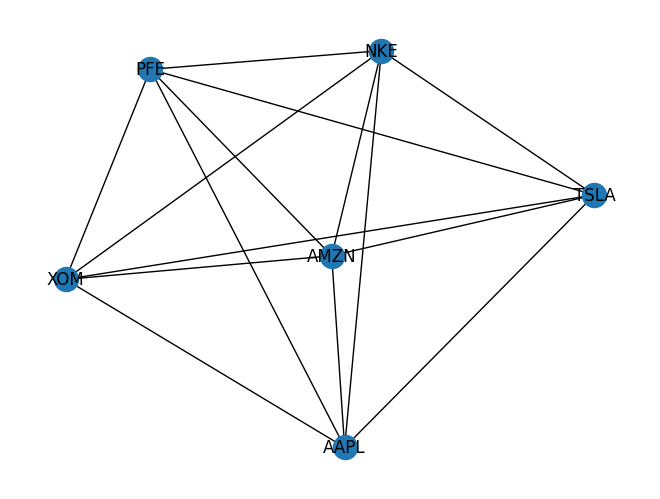

In [54]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

companies = stock_prices.columns.tolist()
G.add_nodes_from(companies)

for i, company1 in enumerate(companies):
    for j, company2 in enumerate(companies):
        if i != j:
            weight = stock_prices.iloc[i, j]
            if weight > 0:
                G.add_edge(company1, company2, weight=weight)

for edge in G.edges(data=True):
    print(f"Edge: {edge[0]} - {edge[1]}, Weight: {edge[2]['weight']}")

nx.draw(G, with_labels=True)
plt.show()

In [55]:
df = stock_prices

In [56]:
df

,AAPL,AMZN,NKE,PFE,TSLA,XOM
2019-01-01,39.480000,76.956497,74.059998,41.034157,20.674667,69.690002
2019-01-02,39.480000,76.956497,74.059998,41.034157,20.674667,69.690002
2019-01-03,35.547501,75.014000,72.750000,39.886147,20.024000,68.620003
2019-01-04,37.064999,78.769501,74.650002,40.796963,21.179333,71.150002
2019-01-05,37.064999,78.769501,74.650002,40.796963,21.179333,71.150002
...,...,...,...,...,...,...
2022-12-27,130.029999,83.040001,117.559998,51.130001,109.099998,110.190002
2022-12-28,126.040001,81.820000,114.980003,50.799999,112.709999,108.379997
2022-12-29,129.610001,84.180000,117.349998,51.330002,121.820000,109.199997
2022-12-30,129.929993,84.000000,117.010002,51.240002,123.180000,110.300003
